# Project: Investigate a Dataset - Why Are People Missing Their Medical Appointments in Espirito Santo State - Vitoria - Brazil?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Medical systems around the world must cope with increasing populations and medical costs. Thus, insights into how medical administrators can improve the efficiency of medical care while bringing down costs are important for every medical facility on Earth. 

The efficiency of medical care can be improved by ensuring that the valuable time of in-demand medical personnel is not wasted by patients missing appointments. Additionally, if patients miss appointments, preventative or early-stage medical interventions may turn into costly, chronic ailments. These missed appointments could be taken by others who need them but who are prevented from seeing medical staff in a timely manner. 

Here we will investigate data that describes the characteristics of patients and their medical appointments for over 100,000 medical appointments in Santo State - Vitoria - Brazil (https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1511158497445000&usg=AFQjCNH7fdguCZGShcl-ghreDoiNSa7kjg). I refered to the forums here to help get my creative juices flowing: https://www.kaggle.com/joniarroba/noshowappointments. 

My dependent variable for this investigation is whether the patient arrives for their scheduled appointment (indicated by the "No-show" column in the CSV file and dataframe). My independent variables are "Appointment ID," "Neighbourhood," and "SMS Received." 

I am using these independent variables as I wish to probe my suspicions that the following are true:

- Patients who have more than one medical appointment miss appointments with a higher frequency than patients with only one appointment. I suspect this might be because those who have multiple appointments have an ongoing medical problem and think about their appointments more often. 
- Patients from certain neighborhoods tend to miss appointments more often than patients from other neighborhoods. Distance from the medical facility, the availability of efficient transportation options, and the average household income of families in each neighborhood (which may have a bearing on the transportation options patients can exploit) may converge to make this an interesting area to investigate. To do this, I'd like to investigate the proportion of appointments made by patients from each neighbourhood that are missed. 
- Patients who receive SMS messages are less likely to miss their appointments than people who do not receive SMS messages. I'd like to compare the proportion of people who receive text messages and miss their appointments to the proportion of people who do not receive text messages and miss their appointments. 

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns



%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [24]:
appointments_df = pd.read_csv('appointment_data.csv') # Load the data into a dataframe

appointments_df.head(10) # Print the first ten rows of the data to make sre the data loaded

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


### Data Cleaning 

There are a couple spelling errors in the column headers. These include "Hipertension" and "Handcap." I have corrected these errors. I'll also change the British spelling of "Neighbourhood" to the American English "Neighborhood" so it doesn't distract me as I do my analysis. 

Update: I also found later that I had to change "No-show" to "No_show" as the ".unique" operation below threw an error when the column name contained a hyphen.  

In [25]:
appointments_df.rename(columns = {'Hipertension':'Hypertension', 
                                  'Handcap':'Handicap', 
                                  'Neighbourhood':'Neighborhood',
                                  'No-show':'No_show'}, inplace = True)

print(appointments_df.columns)

Index([u'PatientId', u'AppointmentID', u'Gender', u'ScheduledDay',
       u'AppointmentDay', u'Age', u'Neighborhood', u'Scholarship',
       u'Hypertension', u'Diabetes', u'Alcoholism', u'Handicap',
       u'SMS_received', u'No_show'],
      dtype='object')


I'm also not really liking the format that "ScheduledDay" and "AppointmentDay" are in, so I have changed these to the datetime64 format. I really don't know what format they are in now, but I don't like it; it is just not intuitive to me.

In [26]:
appointments_df.ScheduledDay = appointments_df.ScheduledDay.apply(np.datetime64)

print(appointments_df.ScheduledDay.head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]


In [27]:
appointments_df.AppointmentDay = appointments_df.AppointmentDay.apply(np.datetime64)

print(appointments_df.AppointmentDay.head())

0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentDay, dtype: datetime64[ns]


I'm also not really liking how "PatientId" is displayed in exponential form now. I want to see all the digits of the numbers in this column. 

In [28]:
appointments_df.PatientId = appointments_df.PatientId.astype(np.int64)

print (appointments_df.PatientId.head())

0     29872499824296
1    558997776694438
2      4262962299951
3       867951213174
4      8841186448183
Name: PatientId, dtype: int64


I just want to do one final check to see if there is anything bizarre in the data. 

In [29]:
print('PatientId:',(appointments_df.PatientId.astype(np.int64)).unique())
print('AppointmentID:',appointments_df.AppointmentID.unique())
print('Gender:',appointments_df.Gender.unique())
print('ScheduledDay:',(appointments_df.ScheduledDay.apply(np.datetime64)).unique())
print('AppointmentDay:',(appointments_df.AppointmentDay.apply(np.datetime64)).unique())
print('Age:',appointments_df.Age.unique())
print('Neighborhood:',appointments_df.Neighborhood.unique())
print('Scholarship:',appointments_df.Scholarship.unique())
print('Hypertension:',appointments_df.Hypertension.unique())
print('Diabetes:',appointments_df.Diabetes.unique())
print('Alcoholism:',appointments_df.Alcoholism.unique())
print('Handicap:',appointments_df.Handicap.unique())
print('SMS_received:',appointments_df.SMS_received.unique())
print('No_show:',appointments_df.No_show.unique())

appointments_df.head(10)

('PatientId:', array([29872499824296, 558997776694438, 4262962299951, ..., 72633149253362,
       996997666245785, 15576631729893], dtype=int64))
('AppointmentID:', array([5642903, 5642503, 5642549, ..., 5630692, 5630323, 5629448], dtype=int64))
('Gender:', array(['F', 'M'], dtype=object))
('ScheduledDay:', array(['2016-04-29T18:38:08.000000000', '2016-04-29T16:08:27.000000000',
       '2016-04-29T16:19:04.000000000', ...,
       '2016-04-27T16:03:52.000000000', '2016-04-27T15:09:23.000000000',
       '2016-04-27T13:30:56.000000000'], dtype='datetime64[ns]'))
('AppointmentDay:', array(['2016-04-29T00:00:00.000000000', '2016-05-03T00:00:00.000000000',
       '2016-05-10T00:00:00.000000000', '2016-05-17T00:00:00.000000000',
       '2016-05-24T00:00:00.000000000', '2016-05-31T00:00:00.000000000',
       '2016-05-02T00:00:00.000000000', '2016-05-30T00:00:00.000000000',
       '2016-05-16T00:00:00.000000000', '2016-05-04T00:00:00.000000000',
       '2016-05-19T00:00:00.000000000', '2016-05-

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,95985133231274,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,733688164476661,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3449833394123,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,56394729949972,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,78124564369297,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


For the most part, the data is looking good. I desperatly tried to show "ScheduledDay" and "AppointmentDay" in datetime64 format in the output of the code cell above, but I was not able to display it here. I thought this would have been a better and easier wayto look at the data for abberations. Nevertheless, they are in datetime64 in the output of the dataframe above. 

I was also not able to display a full list of all unique elements in the arrays; you will see six unique elements for some of the columns with an elipses between the third and fourth elements. 

One odd data point is -1 for an age, which should be scrubbed from the data given its impossibility. I also do not think that anyone below the age of 18 should be counted for this investigation because they are not legal adults and getting to their appointment on time is not within their control. Including them here says more about their parent or legal guardian than about the patients themselves. 

The names of the neighboorhoods are also not displaying accuratly, which appears to be a result of the tilde and accents in the Portuguese names of the neighborhoods. This displays fine in the dataframe above, so I am not worried about it. 

In [30]:
appointments_df = appointments_df[(appointments_df.Age >=18)]


print('Age:',appointments_df.Age.unique())
print appointments_df.count()

('Age:', array([ 62,  56,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,  50,
        40,  46,  65,  45,  51,  32,  61,  38,  79,  18,  63,  64,  85,
        59,  55,  71,  49,  78,  31,  58,  27,  69,  68,  60,  67,  36,
        35,  20,  26,  34,  33,  42,  47,  41,  44,  37,  24,  66,  77,
        81,  70,  53,  75,  73,  52,  74,  43,  89,  57,  48,  83,  72,
        25,  80,  87,  88,  84,  82,  90,  94,  86,  91,  98,  92,  96,
        93,  95,  97, 102, 115, 100,  99], dtype=int64))
PatientId         83147
AppointmentID     83147
Gender            83147
ScheduledDay      83147
AppointmentDay    83147
Age               83147
Neighborhood      83147
Scholarship       83147
Hypertension      83147
Diabetes          83147
Alcoholism        83147
Handicap          83147
SMS_received      83147
No_show           83147
dtype: int64


I wanted to see how many appointments I was left with after only including patients who were over 18 years old. I also wanted to make sure my age filter was working properly.  

<a id='eda'></a>
## Exploratory Data Analysis


### Are there differences in the prevalence of missed appointments between those who have multiple appointments and those who only have one appointment?

I first started this with the assumption that patients tend to show a history of missing appointments. I wanted to compare [the number of patients with a second missed appointment] over [patients who missed 1 appointment] (for patients with multiple appointments) against the [number of missed appointments] over [the number of appointments where the patient only had one appointment].  

I thought that patients who miss one appointment are more likely to miss a second appointment than patients who only have one appointment and miss it. However, I found that I was not able to develop the code to do this, so I looked at a different metric. 

Here we find every instance of "PatientID" that occurs more than 2 times in a column in the dataframe and save those in a new dataframe.

In [31]:
more_than_one = appointments_df[appointments_df.duplicated(subset='PatientId')]

more_than_one.count()

PatientId         37095
AppointmentID     37095
Gender            37095
ScheduledDay      37095
AppointmentDay    37095
Age               37095
Neighborhood      37095
Scholarship       37095
Hypertension      37095
Diabetes          37095
Alcoholism        37095
Handicap          37095
SMS_received      37095
No_show           37095
dtype: int64

From this, it looks like of the 83,147 appointments made for those who were over 18 years old, 37,095 of them were for patients who scheduled 2 or more appointments.   

In [32]:
number_missed = more_than_one.loc[more_than_one['No_show']=="Yes"]

number_missed.count()

PatientId         7486
AppointmentID     7486
Gender            7486
ScheduledDay      7486
AppointmentDay    7486
Age               7486
Neighborhood      7486
Scholarship       7486
Hypertension      7486
Diabetes          7486
Alcoholism        7486
Handicap          7486
SMS_received      7486
No_show           7486
dtype: int64

Of those appointments for people who had more than one appointment, 7,486 appointments were missed.

In [33]:
only_one = appointments_df.drop_duplicates(subset='PatientId')

only_one.count()

PatientId         46052
AppointmentID     46052
Gender            46052
ScheduledDay      46052
AppointmentDay    46052
Age               46052
Neighborhood      46052
Scholarship       46052
Hypertension      46052
Diabetes          46052
Alcoholism        46052
Handicap          46052
SMS_received      46052
No_show           46052
dtype: int64

This is the number of appointments for people who only had one appointment: 46,052. Another way of saying this is that this is also the number of people who only had one appointment. 

In [34]:
number_missed_only_one = only_one.loc[only_one['No_show']=="Yes"]

number_missed_only_one.count()

PatientId         8836
AppointmentID     8836
Gender            8836
ScheduledDay      8836
AppointmentDay    8836
Age               8836
Neighborhood      8836
Scholarship       8836
Hypertension      8836
Diabetes          8836
Alcoholism        8836
Handicap          8836
SMS_received      8836
No_show           8836
dtype: int64

Of those appointments for people who only had one appointment, 8,486 appointments were missed.

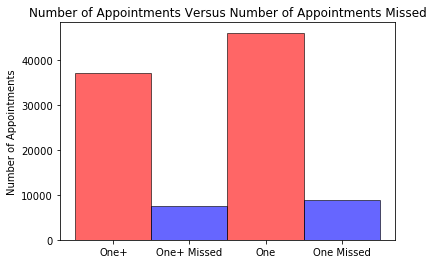

In [35]:
objects = ('One+', 'One+ Missed', 'One', 'One Missed')
y_pos = np.arange(len(objects))
performance = [37095,7486,46052,8836]
 
plt.bar(y_pos, performance, align='center', alpha=0.6, width=1, color=['red', 'blue'], edgecolor='black')
plt.xticks(y_pos, objects)
plt.ylabel('Number of Appointments')
plt.title('Number of Appointments Versus Number of Appointments Missed')
 
plt.show()

Here we have the number of appointments for people who had more than one appointment next to the number of those appointments that were missed. Then we have the number of appointments for people who only had one appointment next to the number of those appointments that were missed. 

I was interested in seeing if appointments were more often missed when people had multiple appointments than appointments when people only had one appointment. This visualization does not seem to give us any insight into that question. 

Let's see if we can probe the differences between those who only have one appointment and those who have multiple appointments a bit more. 

In [36]:
appointments_df['No_show_new'] = np.where(appointments_df['No_show'] == 'No', False, True) # turn "No_show" into Boolean

more_than_one = appointments_df[appointments_df.duplicated(subset='PatientId')] # Add this new Boolean data to the more_than_one dataframe we created above
only_one = appointments_df.drop_duplicates(subset='PatientId')

ave_no_show_multiple = more_than_one.groupby('PatientId')['No_show_new'].mean()
ave_no_show_single = only_one.groupby('PatientId')['No_show_new'].mean()

print ave_no_show_multiple.mean()
print ave_no_show_multiple.count()
print ave_no_show_single.mean()
print ave_no_show_single.count()

0.204429629284
18301
0.191870059932
46052


Here, we turned the "No_show" column into Boolean data so we could probe it further and see if there were any differences between those patients with multiple appointments and those with only one appointment. Unfortunately, there does not appear to be any interesting distinction here. What is kind of interesting is that about 20% of patients miss their appointments in both groups.  

### Missed Appointments by Neighborhood

In [37]:
pd.options.display.max_rows = 100
neighborhoods = appointments_df.groupby('Neighborhood', as_index = False).agg({'No_show_new':['mean','count']}) 

print neighborhoods.head(100)
print neighborhoods.min()
print neighborhoods.max()
print neighborhoods.mean()
print neighborhoods.std()

                   Neighborhood No_show_new      
                                       mean count
0                     AEROPORTO    0.125000     8
1                    ANDORINHAS    0.225825  1696
2               ANTÔNIO HONÓRIO    0.143564   202
3           ARIOVALDO FAVALESSA    0.227513   189
4                BARRO VERMELHO    0.216710   383
5                    BELA VISTA    0.183480  1368
6                BENTO FERREIRA    0.219973   741
7                     BOA VISTA    0.181818   187
8                        BONFIM    0.201709  2107
9                     CARATOÍRA    0.238854  1884
10                       CENTRO    0.205465  2818
11                      COMDUSA    0.196653   239
12                    CONQUISTA    0.178451   594
13                   CONSOLAÇÃO    0.165362  1022
14                   CRUZAMENTO    0.221782  1010
15                     DA PENHA    0.196102  1693
16                   DE LOURDES    0.129412   255
17                    DO CABRAL    0.153846   403


While both appointments from "ILHAS OCEÂNICAS DE TRINDADE" were missed, resulting in a 100% no-show rate, we are going to ignore this because there were only two appointments made by people from this neighborhood. The second highest no-show rate was from the neighnorhood of "SANTOS DUMONT," which had nearly a 30% no-show rate (n=967). We compare this below to the lowest no-show rate from "ILHA DO BOI," which was about 8.6% (n=35).   

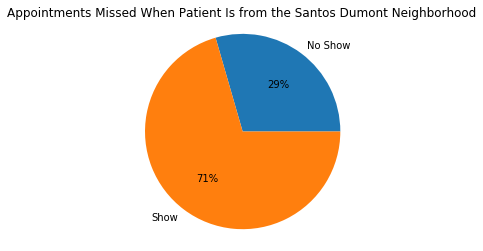

In [38]:
names = 'No Show', 'Show'
sizes = [.294726, .705274]
fig1, santos = plt.subplots()
santos.pie(sizes, labels=names, autopct='%1.0f%%')
santos.axis('equal')  
santos.set_title('Appointments Missed When Patient Is from the Santos Dumont Neighborhood')

plt.show()

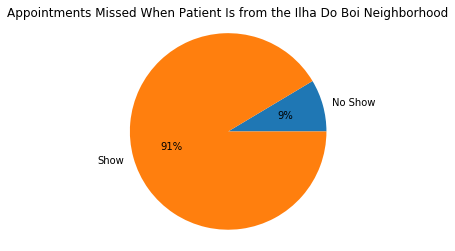

In [39]:
names = 'No Show', 'Show'
sizes = [.085714 , .914286]
fig1, ilha = plt.subplots()
ilha.pie(sizes, labels=names, autopct='%1.0f%%')
ilha.axis('equal')  
ilha.set_title('Appointments Missed When Patient Is from the Ilha Do Boi Neighborhood')

plt.show()

Missed appointments seem to be significantly different between these two neighborhoods. Let's do a quick test to see if these differences are statistically significant. We want to see what the mean and standard deviation of "No_show_new" is for the entire dataframe and see if .085714 are .294726 are within two standard deviations of the mean. As we can see, the mean of the means for each neighborhood for no shows is about 20%, and the standrd deviation is just about 1% meaning that these two attendance values fall outside of two standard deviations from the mean (i.e., 18%-22% no-show rate). It would be interesting to explore the reasons behind these figures in further detail.   

### Do Text Message Help People Make Their Appointments? 

In [40]:
text_messages = appointments_df.groupby('SMS_received', as_index = False).agg({'No_show_new':['mean','count']})

print text_messages


  SMS_received No_show_new       
                      mean  count
0            0    0.160956  55686
1            1    0.267980  27461


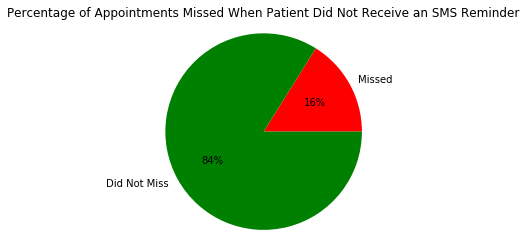

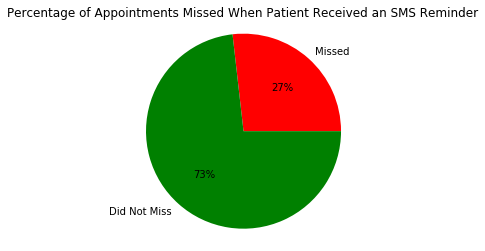

In [41]:
names = 'Missed', 'Did Not Miss'
sizes = [.160956 , .839044]
fig1, no_sms = plt.subplots()
no_sms.pie(sizes, labels=names, autopct='%1.0f%%', colors=['red', 'green'])
no_sms.axis('equal')  
no_sms.set_title('Percentage of Appointments Missed When Patient Did Not Receive an SMS Reminder')

plt.show()

names = 'Missed', 'Did Not Miss'
sizes = [.267980, .73202]
fig1, no_sms = plt.subplots()
no_sms.pie(sizes, labels=names, autopct='%1.0f%%', colors=['red', 'green'])
no_sms.axis('equal')  
no_sms.set_title('Percentage of Appointments Missed When Patient Received an SMS Reminder')

plt.show()

At first, I found this finding surprising. It seems that those who did not receive text messages missed 16% of all appointments; those who did receive text messages missed a higher percentage of appointments: 26%. 

<a id='conclusions'></a>
## Conclusions

For the most part, I was able to probe my initial research questions. However, I was really interested in grouping all people with multiple appointments to see if people who missed one appointment missed their second appointment more frequently than people with only one appointment missed their appointment. I wanted to do this to see if people tended to exhibit a history of missing appointments, but after much thinking I was not able to think of how to code this. Nevertheless, this work is a foundation for further analysis pertaining to that research question.

My other two research questions were much more interesting: I found that the number of missed appointments from one neighborhood was nearly 30% and the missed appointments from another neighborhood hovered around 9%. I would like to explore the underlying causes for this further. To make a robust analysis on this point, I would like a longer time serious of data (rather than just 3 months in the summer of 2016) to help balance out any time-bound factors that happened during those three months (e.g., bad weather, sporting events, national holidays.)

The insights I gained into my third research question are the most puzzling of all the analysis I did. The result make me look for errors in my code, but I did not seem to find any. Those who received SMS messages seemed to miss appointments more frequently than those who did not. This result could be the result of a number of factors, including that those who have or think they might miss appointments are those who tend to set up SMS messaging. It could also be that those who do not receive SMS messages are contacted another way that the data does not illuminate; for example, the medical facility may contact them via phone to remind them of their appointment and this may me more effective than an SMS message. 

I am very happy with the analysis I did and am excited to keep improving my data analysis skills.